In [21]:
from sklearn.datasets import load_sample_image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [24]:
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

(2, 427, 640, 3)


In [83]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

In [84]:
filters[:, 3, :, 0] = 1 # vertical line
print(filters[:,:,0,0])

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [86]:
filters[3, :, :, 1] = 1 # horizontal line
print(filters[:,:,0,1])

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [92]:
outputs = tf.nn.conv2d(images, filters, strides=1,padding = "SAME")
plt.imshow(outputs[0, :, :, 0], cmap="gray")
plt.show()

In [95]:
plt.imshow(outputs[1, :, :, 0], cmap="gray")
plt.show()

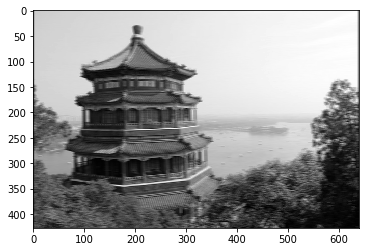

In [94]:
plt.imshow(outputs[0, :, :, 1], cmap="gray")
plt.show()

In [96]:
plt.imshow(outputs[1, :, :, 1], cmap="gray")
plt.show()

In [ ]:
#Challenge 1: Make a filter that smooths the images
#Challenge 2: Make a filter that sharpens the images

In [101]:
from tensorflow import keras
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


In [102]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [140]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [141]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [142]:
from tensorflow.keras.utils import to_categorical

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3546 - accuracy: 0.8979 - val_loss: 0.2182 - val_accuracy: 0.9372
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1845 - accuracy: 0.9466 - val_loss: 0.1404 - val_accuracy: 0.9597
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1265 - accuracy: 0.9641 - val_loss: 0.1065 - val_accuracy: 0.9687


In [143]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


In [144]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

In [145]:
print(np.shape(filters),np.shape(biases))

(3, 3, 1, 8) (8,)


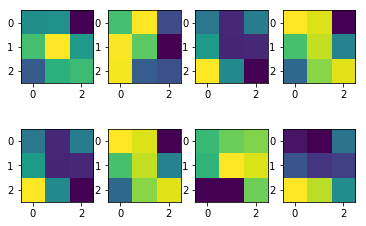

In [146]:
fig, axs = plt.subplots(2,4)
for i in range(2):
    for j in range(4):
        axs[i,j].imshow(filters[:,:,0,2*i+j])
        

In [139]:
#Challenge 3: Change the filter size to 5 or 10. Can you attach some explanation to what the filters are doing? Is accuracy
#increased or decreased? 
#Challenge 4: Decrease the number of filters to 4 or increase them to 16. What do you observe?